,Dataset,Model,MAP,MRR,Precision@10
0,ANTIQUE,BERT,0.231343,0.849043,0.46300
1,ANTIQUE,BM25,0.274661,0.850163,0.52850
2,ANTIQUE,Hybrid,0.253849,0.881457,0.51800
3,ANTIQUE,TF-IDF,NaN,NaN,0.37500
4,QUORA,BERT,0.837902,0.864390,0.13284
5,QUORA,BM25,0.694036,0.734929,0.11171
6,QUORA,Hybrid,0.826612,0.859975,0.12830
7,QUORA,TF-IDF,0.671194,0.707136,0.10907


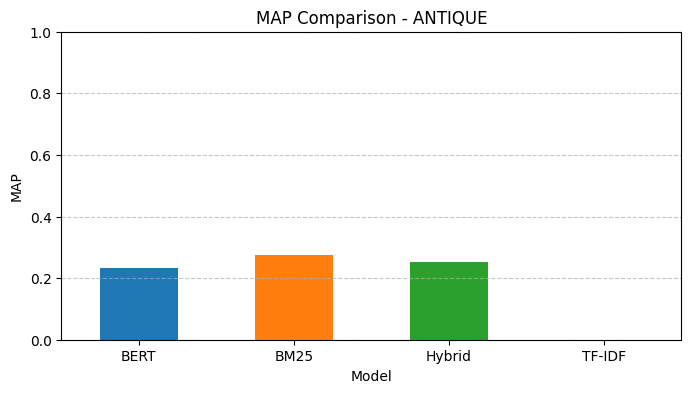

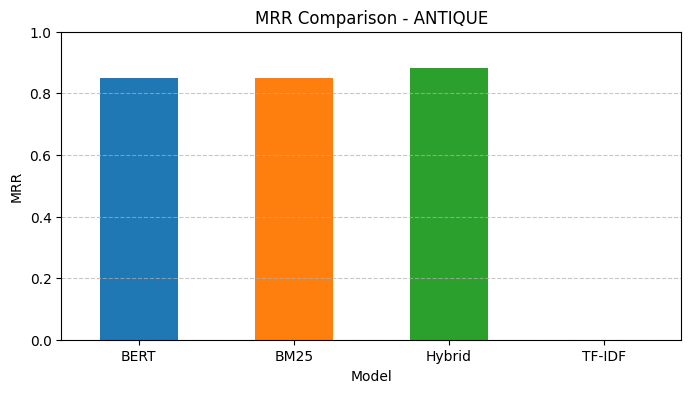

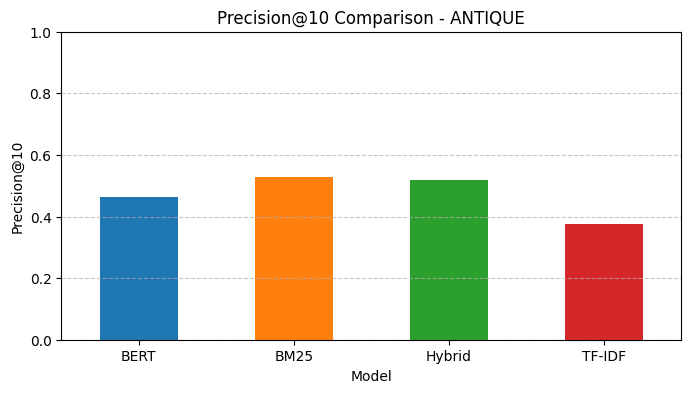

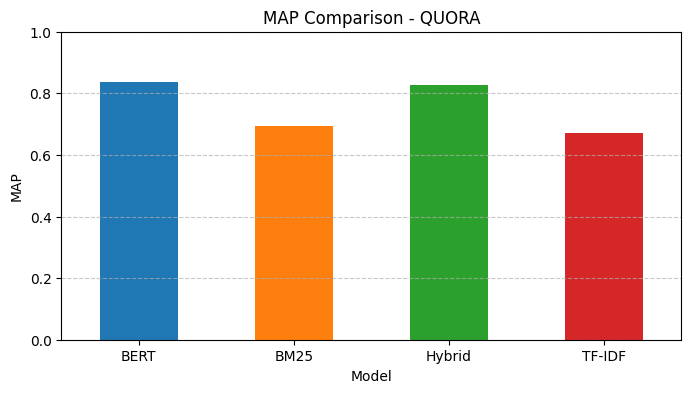

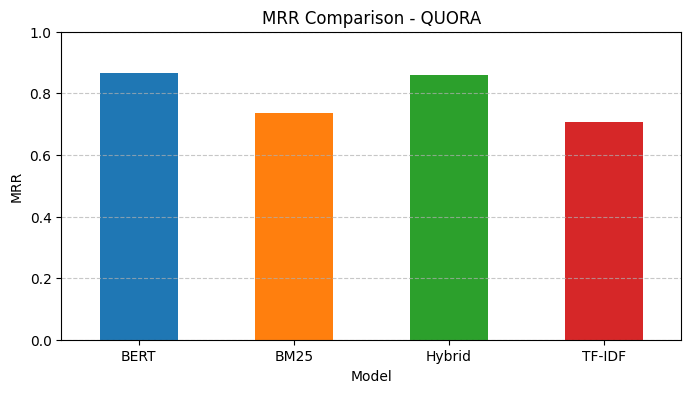

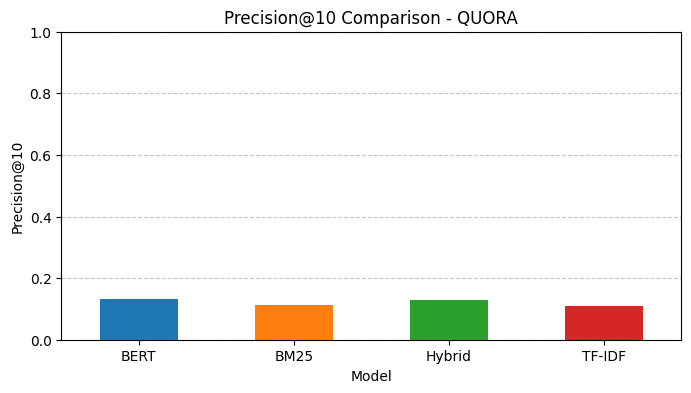

In [2]:

import os
import json
from pathlib import Path
import pandas as pd

# غير مجلد العمل إذا لزم الأمر
os.chdir(r"C:\Users\muhammad\Desktop\ir")


import json
from pathlib import Path
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt


# إعداد المسارات وأسماء الملفات
EVAL_DIR = Path("data/evaluation_results")
DATASETS = ["antique", "quora"]

REPRESENTATIONS = [
    ("TF-IDF",  "{}_evaluation_results.json"),
    ("BM25",    "{}_bm25_evaluation_results.json"),
    ("BERT",    "{}_bert_evaluation_results.json"),
    ("Hybrid",  "{}_hybrid_evaluation_results.json"),  # عدّل اسم الملف/الأوزان إذا احتجت
]

# تجميع النتائج
all_results = []
for dataset in DATASETS:
    for name, filename_pattern in REPRESENTATIONS:
        eval_path = EVAL_DIR / filename_pattern.format(dataset)
        if not eval_path.exists():
            print(f"❌ الملف غير موجود: {eval_path}")
            continue
        with open(eval_path, encoding="utf-8") as f:
            data = json.load(f)
        all_results.append({
            "Dataset": dataset.upper(),
            "Model": name,
            "MAP": data.get("MAP"),
            "MRR": data.get("MRR"),
            "Precision@10": data.get("Precision@10")
        })

# عرض النتائج في جدول
df = pd.DataFrame(all_results)
df = df.sort_values(by=["Dataset", "Model"]).reset_index(drop=True)
display(df)

# رسم بياني لكل مقياس في كل داتا
metrics = ["MAP", "MRR", "Precision@10"]

for dataset in DATASETS:
    plot_df = df[df["Dataset"] == dataset.upper()].set_index("Model")
    if plot_df.empty:
        continue
    for metric in metrics:
        plt.figure(figsize=(8,4))
        plot_df[metric].plot(kind="bar", color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])
        plt.title(f"{metric} Comparison - {dataset.upper()}")
        plt.ylabel(metric)
        plt.ylim(0, 1)
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
